# Project: Wrangle and Analyze Data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
 <ul>
  <li><a href="#dataset">The Data</a></li>
  <li><a href="#import_modules">Load Modules</a></li>
 </ul>
<li><a href="#load_data">Loading Base Data</a></li>
<li><a href="#gather_data">Gathering Data</a></li>
<li><a href="#assess_data">Assessing Data</a></li>
<li><a href="#issues">Observed Issues</a></li>
 <ul>
  <li><a href="#quality_issues">Quality Issues</a></li>
  <li><a href="#tidiness_issue">Tidiness Issues</a></li>
 </ul>
<li><a href="#clean_data">Data Cleansing</a></li>
 <ul>
  <li><a href="#clean_weratedogs_archive">Clean WeRateDogs Twitter Archive DataFrame</a></li>
  <li><a href="#clean_image_predictions">Clean Image Predictions DataFrame</a></li>
  <li><a href="#clean_tweet_online">Clean TWEET API Online DataFrame</a></li>
 </ul>
<li><a href="#store_analyze_visualize_data">Storing, Analyzing, and Visualizing Data for this Project</a></li>
 <ul>
  <li><a href="#store_data">Store the Cleaned dataframes</a></li>
  <li><a href="#analyze_data">Analyze Data</a></li>
  <li><a href="#descriptive_statistical_analyses">Descriptive Statistical Analyses</a></li>
  <li><a href="#visualize_data">Data Visualization</a></li>
 </ul>
<li><a href="#references">References</a></li>
</ul>

## <a id='intro'></a> Introduction 
This project focuses on exploring data wrangling and cleansing techniques in Python. The data set involved in this project is the tweet archive of Twitter account **`We Rate Dogs`** ([@dog_rates](https://twitter.com/dog_rates)), a.k.a. [WeRateDogs](https://en.wikipedia.org/wiki/WeRateDogs). WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. WeRateDogs has over 7 million followers since its debut and has received international media coverage.

One of the reasons why WeRateDogs caught people's eyes is its ratings. Almost all ratings went beyond 10, such as 11/10, 12/10, and 13/10, etc. on a scale to 10 system. `Doesn't make any sense?` That's exactly what triggered the famous quote, "[**they're good dogs Brent**](https://knowyourmeme.com/memes/theyre-good-dogs-brent)" and eventually made WeRateDogs so popular.

My goal is to prepare the WeRateDogs Twitter data through wrangling and cleansing for in-depth visualizations and achieving trustworthy analyses. 

### <a id="dataset"></a>The Data
The WeRateDogs Twitter archival dataset in this project is a filtered (enhanced) version of tweets which contain ratings, dog name, and dog "stage", such as doggo, floofer, pupper and puppo, etc. This leaves about 2,356 out of 5,000+ tweets in the process. It serves as the base of the analyses. This dataset is supplemented by the Image Predictions DataFrame and TWEET API Online DataFrame

- Enhanced Twitter Archive
- Additional Data via the Twitter API
- Image Predictions File


Some of the challenges with these data include:
- Ratings, dog name and dog stages may not be correct. That is, I need to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
- `Retweet count` and `favorite count` are two of the notable column omissions. This additional data can be gathered by anyone from Twitter's API. I'm going to leverage the tweet IDs within the WeRateDogs Twitter archive to query Twitter's API and gather this valuable data, etc. More details are elaborated in the [Quality Issues](#quality_issues) and [Tidying Data](#tidying_data) sections.

### Tasks  
Data wrangling tasks in this project consists of:
- [**Gathering data**](#gather_data)
- [**Assessing data**](#assess_data)
- [**Cleaning data**](#clean_data)
- [**Storing, analyzing, and visualizing the wrangled data**](#store_analyze_visualize_data)

###  <a id="import_modules"></a> Import Modules

In [275]:
# ## SQLite related
# import sqlite3

## Data Analytics
import numpy as np
import pandas as pd
from scipy import stats
# from scipy.stats import mode
# from math import pi
# import nltk

## Data Visualization
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
# from matplotlib import animation,rc
import seaborn as sns
# from mpl_toolkits.basemap import Basemap
# from mpl_toolkits.mplot3d import Axes3D
# import plotly.offline as py
# import plotly.graph_objs as go
# import plotly.tools as tls
# import folium
# import folium.plugins
# import networkx as nx
# from PIL import Image
# from wordcloud import WordCloud

## Project related modules
import requests
import tweepy
import json
from functools import reduce

## Systems
import os, re
from datetime import timedelta, date, datetime
import time, math
# import warnings
# import base64
# import itertools
# from subprocess import check_output
## from collections import , deque
from collections import defaultdict, Counter
import pprint as pp

%matplotlib inline

In [37]:
# ## Define Constants used in this notebook
# ThisYear = date.today().timetuple()[0]

### Environment Settings:
pd.set_option('display.max_columns', 500)
## pd.set_option('display.max_colwidth', -1) ## If Display entire cells
# pd.set_option('display.max_rows', 500)
# py.init_notebook_mode(connected=True)
# warnings.filterwarnings("ignore")

> ## <a id="load_data"></a> Loading Data

Enhanced Twitter archive file: twitter_archive_enhanced.csv

In [36]:
## Read CSV file
df_arc = pd.read_csv('data_wrangle/twitter-archive-enhanced.csv')

## no difference:
## df_arc = pd.read_csv('data_wrangle/twitter-archive-enhanced-2.csv')

## Ref01
df_arc.sort_values('timestamp')
## df_arc.head()
df_arc.sample(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2200,668655139528511488,NaN,NaN,2015-11-23 04:59:42 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Say hello to Winifred. He is a Papyrus Hydrangea mix. Can tie shoes. 11/10 inspiring pup https://t.co/mwnBN6ZkPt,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668655139528511488/photo/1,11,10,Winifred,None,None,None,None
1211,715360349751484417,NaN,NaN,2016-03-31 02:09:32 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Bertson. He just wants to say hi. 11/10 would boop nose https://t.co/hwv7Wq6gDA,NaN,NaN,NaN,https://twitter.com/dog_rates/status/715360349751484417/photo/1,11,10,Bertson,None,None,None,None
1579,687312378585812992,NaN,NaN,2016-01-13 16:36:55 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","""You got any games on your phone"" 7/10 for invasive brown Dalmatian pupper https://t.co/yzGR9xjE9Q",NaN,NaN,NaN,https://twitter.com/dog_rates/status/687312378585812992/photo/1,7,10,None,None,None,pupper,None


> ## <a id="gather_data"></a>Gathering Data

In [3]:
## Download tweet image predictions TSV using the Requests library and write it to image_predictions.tsv
## Ref. https://github.com/gouravaich/data-analyst-nanodegree/tree/master/P3%20-%20Wrangle%20and%20Analyze%20Data
## Ref. https://github.com/RedRock42/Udacity-Nanodegree-Portfolio/tree/master/P4.Wrangling%20%26%20Analyzing%20Twitter%20Data
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

## Save to a file
with open('data_wrangle/image_predictions.tsv', mode='wb') as f:
  f.write(response.content)

  
df_img = pd.read_csv('data_wrangle/image_predictions.tsv', sep='\t')
df_img.sample(3)

<Response [200]>


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
780,689977555533848577,https://pbs.twimg.com/media/CZNK7NpWwAEAqUh.jpg,1,cowboy_hat,0.291081,False,Labrador_retriever,0.179625,True,sombrero,0.121493,False
884,698953797952008193,https://pbs.twimg.com/media/CbMuxV5WEAAIBjy.jpg,1,Italian_greyhound,0.382378,True,redbone,0.102255,True,shower_cap,0.076834,False
1362,761292947749015552,https://pbs.twimg.com/media/CpCn5aXXgAAOPTm.jpg,1,standard_poodle,0.660893,True,Samoyed,0.314886,True,miniature_poodle,0.008834,True


In [4]:
### Declare Twitter API Authentication keys and access tokens
## Ref01-https://stackoverflow.com/questions/28384588/twitter-api-get-tweets-with-specific-id
## Use my own twitter keys - Worked:
consumer_key = 'FdvfVKse7jY28zNdhVmi6FAYV'
consumer_secret = '4jcKnQyZQO3TTVGMhvPPZl5lXwbHZFDdnCuytBlcaO9Wa0j8In'
access_token = '149686788-RKqv86O727unE9Cz8dHS2SLYdBMNXFq1QaEmTJj9'
access_secret = 'A7XYBpJeJmwRfc3v82Xnm3NZ2ar9Zf0jVWpIvv0IvG2Gv'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth_handler=auth,
                 wait_on_rate_limit = True,
                 wait_on_rate_limit_notify = True)

# api = tweepy.API(auth_handler=auth,
#                  parser = tweepy.parsers.JSONParser(),
#                  wait_on_rate_limit = True,
#                  wait_on_rate_limit_notify = True)

In [14]:
## For loop which will add each available tweet to a new line of tweet_json.txt
## Ref08. https://github.com/RedRock42/Udacity-Nanodegree-Portfolio/tree/master/P4.Wrangling%20%26%20Analyzing%20Twitter%20Data
## Why Both Ref07 and 08 got me an empty tweet_data?? because no Twitter keys.

tweet_ids = list(df_arc['tweet_id'])  ## tweet_ids = list(df_arc.tweet_id)
## print(len(tweet_ids))  ## 2356

start = time.process_time()

### Store Twitter API data
## Ref02 - 
tweet_data = {}

tweet_id_success = []
tweet_id_missing = []

for tweet_id in tweet_ids:
  try:
    tweet_status = api.get_status(tweet_id,
                                  tweet_mode = 'extended',
                                  wait_on_rate_limit=True,
                                  wait_on_rate_limit_notify=True)
    tweet_data[str(tweet_id)] = tweet_status._json
    tweet_id_success.append(tweet_id)
  except Exception as e:
    tweet_id_missing.append(tweet_id)

elapsed_time = time.process_time() - start
print("Elapsed Time: {}".format(elapsed_time))  ## 94. seconds?? 8:09pm - 8:14pm
print("Number of valid tweet_ids: {}".format(len(tweet_id_success)))
print("Number of missing tweet_ids: {}".format(len(tweet_id_missing)))

Rate limit reached. Sleeping for: 762
Rate limit reached. Sleeping for: 755


Elapsed Time: 128.15625
Number of valid tweet_ids: 2337
Number of missing tweet_ids: 19


In [15]:
## import json
## Ref08. https://github.com/RedRock42/Udacity-Nanodegree-Portfolio/tree/master/P4.Wrangling%20%26%20Analyzing%20Twitter%20Data

with open('data_wrangle/tweet_json.txt', 'w', encoding = 'utf-8') as outfile:  
  json.dump(tweet_data, outfile, 
            sort_keys = True,
            indent = 2,
            ensure_ascii = False)
  
df_tweet = pd.read_json("data_wrangle/tweet_json.txt", orient = "index")
df_tweet.sample(3)


,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,quoted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,retweet_count,retweeted,retweeted_status,source,truncated,user
1992-11-03 07:22:26.191278080,NaN,NaN,2016-04-15 00:46:48,"[0, 87]","{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/XS...,2562,0,This is Berkeley. He's in a predicament. 10/10...,NaN,...,NaN,NaN,NaN,NaN,709,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",0,"{'contributors_enabled': False, 'created_at': ..."
1992-10-20 03:22:59.208073216,NaN,NaN,2016-04-11 15:43:12,"[0, 118]","{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/S6...,5215,0,This is Harnold. He accidentally opened the fr...,NaN,...,NaN,NaN,NaN,NaN,2020,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",0,"{'contributors_enabled': False, 'created_at': ..."
1993-12-26 20:53:38.950160384,NaN,NaN,2016-07-23 19:49:07,"[0, 112]","{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/KG...,6944,0,This is Jax. He is a majestic mountain pupper....,NaN,...,NaN,NaN,NaN,NaN,2138,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",0,"{'contributors_enabled': False, 'created_at': ..."


>## <a id='assess_data'></a>Assessing data

With the collection of basic tweet archive and the retrieved, we move on to assess the data visually and programatically for quality and tidiness concerns. 

In [17]:
df_arc.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [506]:
df_img.info();
print(type(df_img))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB
<class 'pandas.core.frame.DataFrame'>


In [17]:
df_tweet.info();

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2337 entries, 1991-02-08 13:48:08.022790149 to 1998-04-12 22:37:23.555336193
Data columns (total 32 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2337 non-null datetime64[ns]
display_text_range               2337 non-null object
entities                         2337 non-null object
extended_entities                2065 non-null object
favorite_count                   2337 non-null int64
favorited                        2337 non-null int64
full_text                        2337 non-null object
geo                              0 non-null float64
id                               2337 non-null int64
id_str                           2337 non-null int64
in_reply_to_screen_name          77 non-null object
in_reply_to_status_id            77 non-null float64
in_reply_to_status_id_str        77 non-null float64
in_reply_to_user_id              

> ## <a id="issues"></a>Issues Observed

### <a id="quality_issues"></a>`Quality Issues`
Issues with the data's content[Ref08]

Need to remove rows that have been retweeted, therby they are not original tweets

**A tweet that has been retweeted**

The relevant field is retweet_count. This field provides the number of times this tweet was retweeted. Note that this number may vary over time, as additional people retweet the tweet.

**A tweet that is a retweet**

Want to exclude any tweet that is a retweet. Two fields are significant. First, the retweeted_status contains the source tweet (i.e., the tweet that was retweeted). The present or absence of this field can be used to identify tweets that are retweets. Second, the retweet_count is the count of the retweets of the source tweet, not this tweet.

Therefore I will isolate all rows in the retweeted_status column that have a value and delete it from the dataframe. This will remove tweets that are a retweet from the dataframe. 

#### `WeRateDogs Twitter archive` DataFrame:
- Names of dogs are miss labelled, mispelled or missing. Cross-reference text data with Names column.
- Excluded columns from dataset that are not needed for the analysis
- 181 records have a retweeted_status_id, these will need to be exluded from the dataset    

#### `Image Predictions` DataFrame:
- p1 column: capitalize the first letter of each word, make consistent
- p2 column: capitalize the first letter of each word, make consistent
- p3 column: capitalize the first letter of each word, make consistent
- Remove the (_) between the words

#### `Tweet API Online` DataFrame:
- rename the `id` column to "tweet_id" to match the other 2 tables
- 176 records have a retweeted_status, will need to be excluded 


### <a id="tidiness_issue"></a>`Tidiness Issues`

Issues with the structure of the data[Ref08]

#### `WeRateDogs Twitter archive` DataFrame:
- Parse the datetime information into seperate columns
- Drop columns that are not needed & rearrange column order for an easier read
- Combine each dog stage column into a single column named "stage"
- `tweet_id` column needs to be converted from a number to string value
- `Date and Time` columns need to be converted to datetime objects
- `Rating` columns need to be converted to float values

#### `Tweet API Online` DataFrame:
- convert `id` column from a number to a string 
- Reindex the `tweet_df` table using the tweet_id
- Change column order in the Tweet_df and the df tables for an easier read of the data
- Consolidate the `tweet_df` table into the following columns: tweet_id, retweet count, favorite count,text


#### `All DataFrames`: 
- perform an inner join between all three datasets

> ## <a id="clean_data"></a>Cleaning data

In [159]:
## Copy the dataframes 
df_arc_clean = df_arc.copy()
df_img_clean = df_img.copy()
df_tweet_clean = df_tweet.copy()

> ### <a id="clean_weratedogs_archive"></a>Cleaning WeRateDogs Twitter archive dataframe

In [156]:
## df_arc_clean.sample(3)
print(df_arc_clean.columns)
df_arc_clean.name.unique()

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')


array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such',
       'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey',
       'Lilly', 'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella',
       'Grizzwald', 'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey',
       'Gary', 'a', 'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey',
       'Duddles', 'Jack', 'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow',
       'Terrance', 'Aja', 'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict',
       'Venti', 'Goose', 'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian',
       'Walter', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover',
       'Napolean', 'Dawn', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'quite', 'Dewey', 'Scout', 'Gizmo', 'Cooper', 'Harold', 'Shikha',
       'Jamesy', 'Lili', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Nept

#### Issue: Replace faulty names or incorrect names

In [160]:
## Missing Data [Ref08]
## replacing faulty names with None value or corrected Name

## How do I systematically know which dog names are invalid dog breed?? any way to compare with external source?

## print(df_arc_clean.columns)
# Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
#        'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
#        'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
#        'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
#       dtype='object')


replace_map = {'the': 'None', "light":'None', "life":'None', "an":'None',
               "a":'None', "by":'None', "actually":'None', "just":'None',
               "getting":'None',  "infuriating":'None',  "old":'None',
               "all":'None',  "this":'None',  "very":'None',  "mad":'None',
               "not":'None', "one":'None', "my":'None', "O":"O'Malley",
               "quite":"None", "such":"None", }

## print(df_arc_clean.name)
## print(df_arc_clean.name.dtype) ## object
## print(df_arc_clean.name[0]) ## Phineas

df_arc_faulty_names= []
df_arc_faulty_names_removed = []
for key, value in replace_map.items():

  if key in df_arc_clean.name.values:
    df_arc_faulty_names.append(key)
    ## print("Key: {} in df_arc_clean DataFrame".format(key))
  else:
    df_arc_faulty_names_removed.append(key)
    ## print("Key: {} Not in df_arc_clean DataFrame".format(key))

  #   print("{} is in df_arc_clean['name'].".format(key)) if key in df_arc_clean.name.values else \
  #   print("{} is Not in df_arc_clean['name'].".format(key))
  
  df_arc_clean['name'].replace(key, value, inplace=True)
  
print("Faulty names:\t {}".format(df_arc_faulty_names))
print("Faulty names to be removed:\t {}".format(df_arc_faulty_names_removed))

Faulty names:	 ['the', 'light', 'life', 'an', 'a', 'by', 'actually', 'just', 'getting', 'infuriating', 'old', 'all', 'this', 'very', 'mad', 'not', 'one', 'my', 'O', 'quite', 'such']
Faulty names to be removed:	 []


**Verify:**

In [323]:
df_arc_clean_faulty_names= []
df_arc_clean_faulty_names_removed = []

for key, value in replace_map.items():
  if key in df_arc_clean.name.values:
    df_arc_clean_faulty_names.append(key)
  else:
    df_arc_clean_faulty_names_removed.append(key)

num_faulty_names = len(df_arc_clean_faulty_names)
num_faulty_names_removed = len(df_arc_clean_faulty_names_removed)

print("{} are still left in df_arc_clean DataFrame".format(df_arc_clean_faulty_names)) \
if num_faulty_names > 0 else print("Verify After - Total of {} faulty names got cleaned.".format(num_faulty_names_removed))

Total of 21 faulty names got cleaned.


#### Issue: Exclude retweet from the WeRateDogs Twitter Archive DataFrame
- Identify and exclude tweets with not-null retweeted_status_id value

In [162]:
## Identify how many tweets are retweets by the "retweeted_status" columns
print("Before:\n{}".format(df_arc_clean[df_arc_clean['retweeted_status_id'].notnull() == True].count()))

## remove these values from the dataframe using the drop() function
df_arc_clean.drop(df_arc_clean[df_arc_clean['retweeted_status_id'].notnull()== True].index, inplace=True)

## Verify -
print("\nVerify - After:\n{}".format(df_arc_clean[df_arc_clean['retweeted_status_id'].notnull() == True].count()))

Before:
tweet_id                      181
in_reply_to_status_id         0  
in_reply_to_user_id           0  
timestamp                     181
source                        181
text                          181
retweeted_status_id           181
retweeted_status_user_id      181
retweeted_status_timestamp    181
expanded_urls                 180
rating_numerator              181
rating_denominator            181
name                          181
doggo                         181
floofer                       181
pupper                        181
puppo                         181
dtype: int64

Verify - After:
tweet_id                      0
in_reply_to_status_id         0
in_reply_to_user_id           0
timestamp                     0
source                        0
text                          0
retweeted_status_id           0
retweeted_status_user_id      0
retweeted_status_timestamp    0
expanded_urls                 0
rating_numerator              0
rating_denominator            0


#### Issue: Convert the timestamp column from a string to DateTime objects

In [163]:
## DF table: Clean timestamp column
## what data type is the timestamp currently in?
type(df_arc_clean['timestamp'].iloc[0])  ## str

str

In [164]:
print(df_arc_clean.columns)

## Use pd.to_datetime to convert the column from strings to DateTime objects.
df_arc_clean['timestamp'] = pd.to_datetime(df_arc_clean['timestamp'])

## Now that the timestamp column are actually DateTime objects;
## Use .apply() to create 2 new columns, namely Date and Time based off of the timeStamp column. 

df_arc_clean['date'] = df_arc_clean['timestamp'].apply(lambda time: time.strftime('%m-%d-%Y'))
df_arc_clean['time'] = df_arc_clean['timestamp'].apply(lambda time: time.strftime('%H:%M'))

## Verify -
print(df_arc_clean.columns)

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')
Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'date', 'time'],
      dtype='object')


#### Issue: Date and Time columns should be Timestamp to fit time-related operations.

In [ ]:
print("Data Types:\n  Date: {},\n  Time: {}".format(type(df_arc_clean['date'].iloc[0]),
                                               type(df_arc_clean['time'].iloc[0])))

## Type Cast:
df_arc_clean['date'] = pd.to_datetime(df_arc_clean['date'])
df_arc_clean['time'] = pd.to_datetime(df_arc_clean['time'])

## Verify -
print("Data Types after type conversion:\n  Date: {},\n  Time: {}".format(type(df_arc_clean['date'].iloc[0]),
                                                                    type(df_arc_clean['time'].iloc[0])))   

#### Issue: Combine the `Dog Stages` into one column named `Stage`

In [165]:
df_arc_clean['stage'] = df_arc[['doggo', 'floofer','pupper','puppo']].apply(lambda x: ''.join(x), axis=1)

df_arc_clean['stage'].replace("NoneNoneNoneNone","None ", inplace=True)
df_arc_clean['stage'].replace("doggoNoneNoneNone","doggo", inplace=True)
df_arc_clean['stage'].replace("NoneflooferNoneNone","floofer", inplace=True)
df_arc_clean['stage'].replace("NoneNonepupperNone","pupper", inplace=True)
df_arc_clean['stage'].replace("NoneNoneNonepuppo","puppo", inplace=True)

# Verify -
print(df_arc_clean.columns)

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'date', 'time', 'stage'],
      dtype='object')


#### Issue:  Remove unwanted columns and rearrange columns for easier reads

In [166]:
## remove unwanted columns from df_clean columns

## df_arc_clean = df_arc.copy()

print("Number of columns before dropping unwanted columns: {}".format(len(df_arc_clean.columns)))

unwanted_cols = ['timestamp', 'retweeted_status_user_id', 'retweeted_status_id', 'retweeted_status_timestamp', \
               'in_reply_to_status_id', 'in_reply_to_user_id', 'in_reply_to_status_id', 'expanded_urls', \
               'source', 'doggo', 'floofer', 'pupper', 'puppo', 'text']

df_arc_clean.drop(unwanted_cols, axis=1, inplace=True)

## Verify -
print("Number of columns after dropping unwanted columns: {}".format(len(df_arc_clean.columns)))
df_arc_clean.head(5)

Number of columns before dropping unwanted columns: 20
Number of columns after dropping unwanted columns: 7


,tweet_id,rating_numerator,rating_denominator,name,date,time,stage
0,892420643555336193,13,10,Phineas,08-01-2017,16:23,None
1,892177421306343426,13,10,Tilly,08-01-2017,00:17,None
2,891815181378084864,12,10,Archie,07-31-2017,00:18,None
3,891689557279858688,13,10,Darla,07-30-2017,15:58,None
4,891327558926688256,12,10,Franklin,07-29-2017,16:00,None


In [170]:
## Change the order (the index) of the df_clean columns

column_titles = ['tweet_id', 'date', 'time', 'name', 'stage', 'rating_numerator', 'rating_denominator']

df_arc_clean = df_arc_clean.reindex(columns = column_titles)
df_arc_clean.head(5)

,tweet_id,date,time,name,stage,rating_numerator,rating_denominator
0,892420643555336193,08-01-2017,16:23,Phineas,None,13,10
1,892177421306343426,08-01-2017,00:17,Tilly,None,13,10
2,891815181378084864,07-31-2017,00:18,Archie,None,12,10
3,891689557279858688,07-30-2017,15:58,Darla,None,13,10
4,891327558926688256,07-29-2017,16:00,Franklin,None,12,10


#### Issue: tweet_id data type is integer (numpy.int64) or float
- tweet_id values should be string, i.e. 'str', not numeric. Convert this field to strings.

In [178]:
## print("Data Type of tweet_id values: {}".format(type(df_arc_clean.tweet_id[0]))) ## 'numpy.int64'
print("Data Type of tweet_id values: {}".format(type(df_arc_clean.tweet_id.iloc[0]))) ## 'numpy.int64'

## Update the data type of tweet_id:
df_arc_clean.tweet_id = df_arc_clean.tweet_id.astype(str)

## Verify -
print("Data Type of tweet_id values after the conversion: {}".format(type(df_arc_clean.tweet_id.iloc[0])))

Data Type of tweet_id values after the conversion: <class 'str'>


#### Issue: rating_numerator and rating_denominator field should be converted to float, rather than integers.
- Dog ratings can be represented by decimal numbers

In [187]:
print("Data Types:\n  rating_numerator: {},\n  rating_denominator: {}".format(
  type(df_arc_clean['rating_numerator'].iloc[0]),
  type(df_arc_clean['rating_denominator'].iloc[0])))

## Type Cast:
df_arc_clean['rating_numerator'] = df_arc_clean['rating_numerator'].astype(float)
df_arc_clean['rating_denominator'] = df_arc_clean['rating_denominator'].astype(float)

print("Data Types:\n  rating_numerator: {},\n  rating_denominator: {}".format(
  type(df_arc_clean['rating_numerator'].iloc[0]),
  type(df_arc_clean['rating_denominator'].iloc[0])))


Data Types:
  rating_numerator: <class 'numpy.int64'>,
  rating_denominator: <class 'numpy.int64'>
Data Types:
  rating_numerator: <class 'numpy.float64'>,
  rating_denominator: <class 'numpy.float64'>


> ### <a id="clean_tweet_online"></a> Cleaning TWEET API Online dataframe
#### Rename the "id" column to "tweet_id" to match the other 2 DataFrames

In [202]:
print("Columns - Before: {}".format(", ".join(df_tweet_clean.filter(regex='id$').columns.values)))

## Rename the id column to tweet_id:
df_tweet_clean.rename(columns={'id': 'tweet_id'}, inplace=True)

## Verify -
print("After: {}".format(", ".join(df_tweet_clean.filter(regex='id$').columns.values)))

Before: tweet_id, in_reply_to_status_id, in_reply_to_user_id, quoted_status_id
After: tweet_id, in_reply_to_status_id, in_reply_to_user_id, quoted_status_id


#### Issue: convert tweet_id column from a number to a string value 

In [203]:
print("Data Type of tweet_id values: {}".format(type(df_tweet_clean.tweet_id.iloc[0]))) ## 'numpy.int64'

## Update the data type of tweet_id:
df_tweet_clean.tweet_id = df_tweet_clean.tweet_id.astype(str)

## Verify -
print("Data Type of tweet_id values after the conversion: {}".format(type(df_tweet_clean.tweet_id.iloc[0])))

Data Type of tweet_id values: <class 'numpy.int64'>
Data Type of tweet_id values after the conversion: <class 'str'>


#### Issue: Exclude retweet from the Twitter API Online DataFrame
- Identify and exclude tweets which are not original, i.e. those with not-null retweeted_status

In [204]:
## Identify how many tweets are retweets by the "retweeted_status" columns
print("Before:\n{}".format(df_tweet_clean[df_tweet_clean['retweeted_status'].notnull() == True].count()))

## remove these values from the dataframe using the drop() function
df_tweet_clean.drop(df_tweet_clean[df_tweet_clean['retweeted_status'].notnull()== True].index, inplace=True)

## Verify -
print("\nVerify - After:\n{}".format(df_tweet_clean[df_tweet_clean['retweeted_status'].notnull() == True].count()))

Before:
contributors                     0  
coordinates                      0  
created_at                       166
display_text_range               166
entities                         166
extended_entities                75 
favorite_count                   166
favorited                        166
full_text                        166
geo                              0  
tweet_id                         166
id_str                           166
in_reply_to_screen_name          0  
in_reply_to_status_id            0  
in_reply_to_status_id_str        0  
in_reply_to_user_id              0  
in_reply_to_user_id_str          0  
is_quote_status                  166
lang                             166
place                            0  
possibly_sensitive               90 
possibly_sensitive_appealable    90 
quoted_status                    0  
quoted_status_id                 1  
quoted_status_id_str             1  
quoted_status_permalink          1  
retweet_count                 

#### Issue: remove unwanted columns from the dataframe

In [205]:
## Before dropping unwanted columns:
print("Number of columns before dropping unwanted columns: {}".format(len(df_tweet_clean.columns)))

## remove unwanted columns from df_tweet_clean columns
df_tweet_unwanted_cols = ['contributors', 'coordinates', 'created_at', 'entities', 'extended_entities', 'favorited',
                          'geo', 'id_str', 'in_reply_to_screen_name', 'in_reply_to_status_id',
                          'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str',
                          'is_quote_status', 'lang', 'place', 'possibly_sensitive', 'possibly_sensitive_appealable',
                          'quoted_status', 'quoted_status_id', 'quoted_status_id_str', 'retweeted',
                          'retweeted_status', 'source', 'truncated', 'user']

df_tweet_clean.drop(df_tweet_unwanted_cols, axis=1, inplace=True)

## Verify -
print("Number of columns after dropping unwanted columns: {}".format(len(df_tweet_clean.columns)))
df_tweet_clean.head(3)

Number of columns before dropping unwanted columns: 32
Number of columns after dropping unwanted columns: 6


,display_text_range,favorite_count,full_text,tweet_id,quoted_status_permalink,retweet_count
1991-02-08 13:48:08.022790149,"[0, 131]",2514,Here we have a Japanese Irish Setter. Lost eye in Vietnam (?). Big fan of relaxing on stair. 8/10 would pet https://t.co/BLDqew2Ijj,666020888022790144,NaN,496
1991-02-08 16:08:05.002620928,"[0, 139]",125,This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,666029285002620928,NaN,46
1991-02-08 17:16:52.701032449,"[0, 130]",121,Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,666033412701032448,NaN,43
1991-02-08 20:17:06.329800704,"[0, 137]",289,This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,666044226329800704,NaN,136
1991-02-08 21:40:48.165822465,"[0, 120]",105,Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,666049248165822464,NaN,42


> ### <a id="clean_image_predictions"></a>Cleaning Image Predictions dataframe
#### Issue: Replace the underscore in the p1, p2, and p3 columns

In [220]:
## Before
print("Before: {}".format(df_img_clean.filter(regex='^p[1-3]$').head()))
## e.g. Welsh_springer_spaniel => Welsh springer spaniel; Rhodesian_ridgeback => Rhodesian ridgeback, etc.
## df_img_clean.filter(regex='^p[1-3]$').head()

## Replacing underscore in p1, p2 and p3 values:
df_img_clean['p1'] = df_img_clean['p1'].str.replace('_', ' ')
df_img_clean['p2'] = df_img_clean['p2'].str.replace('_', ' ')
df_img_clean['p3'] = df_img_clean['p3'].str.replace('_', ' ')

## Verify -
print("\nVerify After: {}".format(df_img_clean.filter(regex='^p[1-3]$').head()))

Before:                        p1                  p2                   p3
0  Welsh_springer_spaniel  collie              Shetland_sheepdog  
1  redbone                 miniature_pinscher  Rhodesian_ridgeback
2  German_shepherd         malinois            bloodhound         
3  Rhodesian_ridgeback     redbone             miniature_pinscher 
4  miniature_pinscher      Rottweiler          Doberman           
Verify After:                        p1                  p2                   p3
0  Welsh springer spaniel  collie              Shetland sheepdog  
1  redbone                 miniature pinscher  Rhodesian ridgeback
2  German shepherd         malinois            bloodhound         
3  Rhodesian ridgeback     redbone             miniature pinscher 
4  miniature pinscher      Rottweiler          Doberman           


#### Issue: Initial-capitalizing p1, p2 and p3 values

In [221]:
print("Before: {}".format(df_img_clean.filter(regex='^p[1-3]$').head()))

## Replacing underscore in p1, p2 and p3 values:
df_img_clean['p1'] = df_img_clean['p1'].str.title()
df_img_clean['p2'] = df_img_clean['p2'].str.title()
df_img_clean['p3'] = df_img_clean['p3'].str.title()

## Verify -
print("\nVerify After: {}".format(df_img_clean.filter(regex='^p[1-3]$').head()))

Before:                        p1                  p2                   p3
0  Welsh springer spaniel  collie              Shetland sheepdog  
1  redbone                 miniature pinscher  Rhodesian ridgeback
2  German shepherd         malinois            bloodhound         
3  Rhodesian ridgeback     redbone             miniature pinscher 
4  miniature pinscher      Rottweiler          Doberman           

Verify After:                        p1                  p2                   p3
0  Welsh Springer Spaniel  Collie              Shetland Sheepdog  
1  Redbone                 Miniature Pinscher  Rhodesian Ridgeback
2  German Shepherd         Malinois            Bloodhound         
3  Rhodesian Ridgeback     Redbone             Miniature Pinscher 
4  Miniature Pinscher      Rottweiler          Doberman           


#### Issue: Convert "tweet_id" column to String

In [222]:
print("Data Type of tweet_id values: {}".format(type(df_img_clean.tweet_id.iloc[0]))) ## 'numpy.int64'

## Update the data type of tweet_id:
df_img_clean.tweet_id = df_img_clean.tweet_id.astype(str)

## Verify -
print("Data Type of tweet_id values after the conversion: {}".format(type(df_img_clean.tweet_id.iloc[0])))

Data Type of tweet_id values: <class 'numpy.int64'>
Data Type of tweet_id values after the conversion: <class 'str'>


#### Use an inner join, i.e. Pandas merge(), to combine DataFrames into a single one

In [223]:
df_merge = pd.merge(df_arc_clean, df_tweet_clean, on='tweet_id', how='inner')
df_merge = pd.merge(df_merge, df_img_clean, on='tweet_id', how='inner')
df_merge.head(3)

,tweet_id,date,time,name,stage,rating_numerator,rating_denominator,display_text_range,favorite_count,full_text,quoted_status_permalink,retweet_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,891815181378084864,2017-07-31,2019-04-30 00:18:00,Archie,None,12.0,10.0,"[0, 121]",24347,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,4009,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,Malamute,0.078253,True,Kelpie,0.031379,True
1,891689557279858688,2017-07-30,2019-04-30 15:58:00,Darla,None,13.0,10.0,"[0, 79]",40928,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,8348,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,Paper Towel,0.170278,False,Labrador Retriever,0.168086,True,Spatula,0.040836,False
2,891327558926688256,2017-07-29,2019-04-30 16:00:00,Franklin,None,12.0,10.0,"[0, 138]",39124,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,9048,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,Basset,0.555712,True,English Springer,0.225770,True,German Short-Haired Pointer,0.175219,True


#### Fix the "Date & Time" columns in the new df_merge DataFrame. 
- Rearrange the Date: month-day-year
- Drop the date info from the Time column

In [227]:
print("Before:\n  Date: {}\n  Time: {}".format(df_merge.date.head(3), df_merge.time.head(3)))

df_merge['date'] = df_merge['date'].apply(lambda time: time.strftime('%m-%d-%Y'))
df_merge['time'] = df_merge['time'].apply(lambda time: time.strftime('%H:%M'))

## Verify -
print("\nVerify After:\n  Date: {}\n  Time: {}".format(df_merge.date.head(3), df_merge.time.head(3)))

Before:
  Date: 0   2017-07-31
1   2017-07-30
2   2017-07-29
Name: date, dtype: datetime64[ns]
  Time: 0   2019-04-30 00:18:00
1   2019-04-30 15:58:00
2   2019-04-30 16:00:00
Name: time, dtype: datetime64[ns]

Verify After:
  Date: 0    07-31-2017
1    07-30-2017
2    07-29-2017
Name: date, dtype: object
  Time: 0    00:18
1    15:58
2    16:00
Name: time, dtype: object


> ## <a id="store_analyze_visualize_data"></a> Storing, Analyzing, and Visualizing Data for this Project

- Store the cleaned and merged DataFrame in a CSV file, named twitter_archive_merged.csv. If additional files exist because multiple tables are required for tidiness, name these files appropriately. 
- Analyze and visualize your wrangled data in your wrangle_act.ipynb Jupyter Notebook. At least three (3) insights and one (1) visualization must be produced.

> ### <a id="store_data"></a> Store the Cleaned dataframes

In [229]:
## Save to a file
# folder_name = 'data_wrangle'
# if not os.path.exists(folder_name):
#     os.makedirs(folder_name)
    
df_arc_clean.to_csv('data_wrangle/twitter_archive_cleaned.csv')
df_img_clean.to_csv('data_wrangle/image_predictions_cleaned.csv')
df_tweet_clean.to_csv('data_wrangle/twitter_api_cleaned.csv')
df_merge.to_csv('data_wrangle/twitter_merged.csv')

> ### <a id="analyze_data"></a> Analyze Data
#### Load the updated dataframes

In [230]:
df_master = pd.read_csv("data_wrangle/twitter_merged.csv")
df_img_pred = pd.read_csv("data_wrangle/image_predictions_cleaned.csv")

In [231]:
df_master.head(3)

,Unnamed: 0,tweet_id,date,time,name,stage,rating_numerator,rating_denominator,display_text_range,favorite_count,full_text,quoted_status_permalink,retweet_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,0,891815181378084864,07-31-2017,00:18,Archie,None,12.0,10.0,"[0, 121]",24347,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,4009,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,Malamute,0.078253,True,Kelpie,0.031379,True
1,1,891689557279858688,07-30-2017,15:58,Darla,None,13.0,10.0,"[0, 79]",40928,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,8348,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,Paper Towel,0.170278,False,Labrador Retriever,0.168086,True,Spatula,0.040836,False
2,2,891327558926688256,07-29-2017,16:00,Franklin,None,12.0,10.0,"[0, 138]",39124,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,9048,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,Basset,0.555712,True,English Springer,0.225770,True,German Short-Haired Pointer,0.175219,True


In [232]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1297 entries, 0 to 1296
Data columns (total 24 columns):
Unnamed: 0                 1297 non-null int64
tweet_id                   1297 non-null int64
date                       1297 non-null object
time                       1297 non-null object
name                       1297 non-null object
stage                      1297 non-null object
rating_numerator           1297 non-null float64
rating_denominator         1297 non-null float64
display_text_range         1297 non-null object
favorite_count             1297 non-null int64
full_text                  1297 non-null object
quoted_status_permalink    0 non-null float64
retweet_count              1297 non-null int64
jpg_url                    1297 non-null object
img_num                    1297 non-null int64
p1                         1297 non-null object
p1_conf                    1297 non-null float64
p1_dog                     1297 non-null bool
p2                         1297 non

#### Issue:
- Drop columns: "unnamed : 0" and 'quoted_status_permalink'
- Convert the "tweet_id" column to str

In [233]:
## Before dropping unwanted columns:
print("Number of columns before dropping unwanted columns: {}".format(len(df_master.columns)))
print("Data Type of tweet_id values: {}".format(type(df_master.tweet_id.iloc[0]))) ## 'numpy.int64'

## remove unwanted columns from df_tweet_clean columns
df_master_unwanted_cols = ['Unnamed: 0', 'quoted_status_permalink']

df_master.drop(df_master_unwanted_cols, axis=1, inplace=True)

## Update the data type of tweet_id:
df_master.tweet_id = df_master.tweet_id.astype(str)

## Verify -
print("\nNumber of columns after dropping unwanted columns: {}".format(len(df_tweet_clean.columns)))
print("Data Type of tweet_id values after the conversion: {}".format(type(df_master.tweet_id.iloc[0])))
df_master.head(3)

Number of columns before dropping unwanted columns: 24
Data Type of tweet_id values: <class 'numpy.int64'>

Number of columns after dropping unwanted columns: 6

Data Type of tweet_id values after the conversion: <class 'str'>


,tweet_id,date,time,name,stage,rating_numerator,rating_denominator,display_text_range,favorite_count,full_text,retweet_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,891815181378084864,07-31-2017,00:18,Archie,None,12.0,10.0,"[0, 121]",24347,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,4009,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,Malamute,0.078253,True,Kelpie,0.031379,True
1,891689557279858688,07-30-2017,15:58,Darla,None,13.0,10.0,"[0, 79]",40928,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,8348,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,Paper Towel,0.170278,False,Labrador Retriever,0.168086,True,Spatula,0.040836,False
2,891327558926688256,07-29-2017,16:00,Franklin,None,12.0,10.0,"[0, 138]",39124,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",9048,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,Basset,0.555712,True,English Springer,0.225770,True,German Short-Haired Pointer,0.175219,True


> ### <a id="descriptive_statistical_analyses"></a> Descriptive Statistical Analyses

In [234]:
## Descriptive statistics
stats= df_master.drop(['tweet_id'], axis=1)
stats.describe()

Descriptive statistics of the dataset:


,rating_numerator,rating_denominator,favorite_count,retweet_count,img_num,p1_conf,p2_conf,p3_conf
count,1297.000000,1297.000000,1297.000000,1297.000000,1297.000000,1297.000000,1.297000e+03,1.297000e+03
mean,12.845798,10.546646,8040.006168,2421.511180,1.187355,0.586416,1.372540e-01,6.153904e-02
std,51.187030,7.880543,11257.885505,3925.208831,0.541113,0.273395,1.018138e-01,5.201483e-02
min,1.000000,2.000000,77.000000,11.000000,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,10.000000,10.000000,1660.000000,555.000000,1.000000,0.354674,5.445480e-02,1.657920e-02
50%,11.000000,10.000000,3717.000000,1211.000000,1.000000,0.575751,1.204070e-01,4.970020e-02
75%,12.000000,10.000000,9915.000000,2869.000000,1.000000,0.836572,1.985600e-01,9.472660e-02
max,1776.000000,170.000000,125494.000000,60220.000000,4.000000,1.000000,4.676780e-01,2.710420e-01


**Key Takeaways:**
- The neural network performed the best on the 1st iteration with a mean prediciton of 0.586 
- Mean rating for a dog was 12.846/10 with an outlier of 1776/10
- Mean retweet count for an original tweet was 2422 and a maximum value of 60220.
- Mean favorite count for an original tweet was 8040 and a maximum value of 125494.

#### Question: Investigate the rating_numerator outlier further. What can we learn from it?
- Explore the rating_numerator outlier

In [235]:
df_master[df_master['rating_numerator']==1776]

,tweet_id,date,time,name,stage,rating_numerator,rating_denominator,display_text_range,favorite_count,full_text,retweet_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
450,749981277374128128,07-04-2016,15:00,Atticus,None,1776.0,10.0,"[0, 54]",5315,This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh,2606,https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg,1,Bow Tie,0.533941,False,Sunglasses,0.080822,False,Sunglass,0.050776,False


In [237]:
## Pull his picture the dataset
df_master[df_master['tweet_id']=='749981277374128128'].jpg_url

450    https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg
Name: jpg_url, dtype: object

In [325]:
%%HTML
<h2>Name: Atticus; Breed: Bow Tie</h2>
<img src= https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg>

It turns out the outlier in the rating_numerator data is a dog named **`Atticus`** who loves celebrating America's birthday.

#### Question: Who has the most favorited dog?
- The owner name of the most favored dog here is **`Stephan`**.

In [257]:
print("Owner name of the most popular tweet: {}".format(df_master[df_master["favorite_count"] == 125494].name.values[0]))
df_master[df_master["favorite_count"] == 125494]

Owner name of the most popular tweet: Stephan


,tweet_id,date,time,name,stage,rating_numerator,rating_denominator,display_text_range,favorite_count,full_text,retweet_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
231,807106840509214720,12-09-2016,06:17,Stephan,None,13.0,10.0,"[0, 61]",125494,This is Stephan. He just wants to help. 13/10 such a good boy https://t.co/DkBYaCAg2d,60220,https://pbs.twimg.com/ext_tw_video_thumb/807106774843039744/pu/img/8XZg1xW35Xp2J6JW.jpg,1,Chihuahua,0.50537,True,Pomeranian,0.120358,True,Toy Terrier,0.077008,True


#### Question: Is the most popular tweet, which has a maximum favorite count of 125494, the same tweet with the highest retweet count of 60220?
- Yes. **`Stephan`** is also the one who received the highest retweet count. The neural network predicted it right, he looks like a **`Chihuahua mix`**

In [328]:
%%HTML
<h2>Most popular: Stephan; Breed: Chihuahua</h2>
<img src=https://pbs.twimg.com/ext_tw_video_thumb/807106774843039744/pu/img/8XZg1xW35Xp2J6JW.jpg>

In [261]:
most_favored_tweet_id = df_master[df_master["favorite_count"] == 125494].tweet_id.values[0]
## print(most_favored_tweet_id) ## ['807106840509214720']
## print(type(most_favored_tweet_id)) ## class 'str'>

## Pull the twitter user's picture from the dataset
print("Picture URL: {}".format(df_master[df_master['tweet_id'] == most_favored_tweet_id].jpg_url.values[0]))

print("\nOwner name of the highest retweet count: {}".format(df_master[df_master["retweet_count"] == 60220].name.values[0]))

df_master[df_master["retweet_count"] == 60220]

Picture URL:
  https://pbs.twimg.com/ext_tw_video_thumb/807106774843039744/pu/img/8XZg1xW35Xp2J6JW.jpg

Owner name of the highest retweet count: Stephan


,tweet_id,date,time,name,stage,rating_numerator,rating_denominator,display_text_range,favorite_count,full_text,retweet_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
231,807106840509214720,12-09-2016,06:17,Stephan,None,13.0,10.0,"[0, 61]",125494,This is Stephan. He just wants to help. 13/10 such a good boy https://t.co/DkBYaCAg2d,60220,https://pbs.twimg.com/ext_tw_video_thumb/807106774843039744/pu/img/8XZg1xW35Xp2J6JW.jpg,1,Chihuahua,0.50537,True,Pomeranian,0.120358,True,Toy Terrier,0.077008,True


#### Question: Does this dog also have the most retweets?
- Yes, the same dog is both the most favored one and also received the highest retweet count. 

#### Question: What are the top 5 most popular dog names?
Top dog names are **`Oliver`**, **`Winston`**, **`Tucker`** and **`Penny`**

In [263]:
## What are the top 5 most common dog names?
x = df_master['name']

count = Counter(x)
count.most_common(5)

[('None', 434), ('Oliver', 8), ('Winston', 7), ('Tucker', 7), ('Penny', 6)]

#### Question: What is the most common dog rating?

In [266]:
x = df_master['rating_numerator']
count = Counter(x)
count.most_common()[:1]

[(10.0, 303)]

Most common Dog Rating is 10 with 304 instances

#### Question: Explore the dogs with the lowest dog rating

In [354]:
## Retrieve the lowest rating_numerator-rated dogs 
df_lowest_rated_dogs = df_master[ df_master['rating_numerator'] == min(df_master['rating_numerator'])]
df_lowest_rated_dogs

,tweet_id,date,time,name,stage,rating_numerator,rating_denominator,display_text_range,favorite_count,full_text,retweet_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
963,675153376133427200,12-11-2015,03:21,None,None,1.0,10.0,"[0, 121]",6371,What kind of person sends in a picture without a dog in it? 1/10 just because that's a nice table https://t.co/RDXCfk8hK0,2685,https://pbs.twimg.com/media/CV6gaUUWEAAnETq.jpg,1,Paper Towel,0.327957,False,Mailbox,0.096027,False,Seat Belt,0.034995,False
1232,667549055577362432,11-20-2015,03:44,None,None,1.0,10.0,"[0, 140]",5773,Never seen dog like this. Breathes heavy. Tilts head in a pattern. No bark. Shitty at fetch. Not even cordless. 1/10 https://t.co/i9iSGNn3fx,2296,https://pbs.twimg.com/media/CUOcVCwWsAERUKY.jpg,1,Electric Fan,0.984377,False,Spotlight,0.007737,False,Lampshade,0.001901,False
1284,666287406224695296,11-16-2015,16:11,None,None,1.0,2.0,"[0, 136]",142,This is an Albanian 3 1/2 legged Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv,63,https://pbs.twimg.com/media/CT8g3BpUEAAuFjg.jpg,1,Maltese Dog,0.857531,True,Toy Poodle,0.063064,True,Miniature Poodle,0.025581,True
1287,666104133288665088,11-16-2015,04:02,None,None,1.0,10.0,"[0, 134]",13955,Not familiar with this breed. No tail (weird). Only 2 legs. Doesn't bark. Surprisingly quick. Shits eggs. 1/10 https://t.co/Asgdc6kuLX,6334,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,Hen,0.965932,False,Cock,0.033919,False,Partridge,0.000052,False


In [305]:
## df_master[df_master['tweet_id'] == tweet_id]
print(df_master[df_master['tweet_id'] == tweet_id].p1)

1287    Hen
Name: p1, dtype: object


In [346]:
## Retrieve their tweet_ids:
df_lowest_rated_dogs_tweet_ids = df_lowest_rated_dogs.tweet_id.values
print(df_lowest_rated_dogs_tweet_ids)

## Retrieve their picture URLs:
lowest_rated_dogs = {}
## lowest_rated_dog = {}
for tweet_id in df_lowest_rated_dogs_tweet_ids:

  lowest_rated_dog = {}

  if not df_master[df_master['tweet_id'] == tweet_id].name.values:
    continue

  lowest_rated_dog["P1"] = df_master[df_master['tweet_id'] == tweet_id].p1.values[0]
  lowest_rated_dog['P1_CL'] =  df_master[df_master['tweet_id'] == tweet_id].p1_conf.values[0] ## CL: Confident Level
  lowest_rated_dog['P1_isDog'] =  df_master[df_master['tweet_id'] == tweet_id].p1_dog.values[0]
  lowest_rated_dog["img_url"] = df_master[df_master['tweet_id'] == tweet_id].jpg_url.values[0]
  #   print("\n%%HTML\n<h2>P1: {}</h2>\n<img src={}>".format(lowest_rated_dog["P1"].values[0],
  #                                                             lowest_rated_dog["img_url"].values[0]))
  print("\n%%HTML\n<h2>P1: {}</h2>\n<img src={}>".format(lowest_rated_dog["P1"], lowest_rated_dog["img_url"]))

  lowest_rated_dogs[tweet_id] = lowest_rated_dog

for tweeet_id, attrs in lowest_rated_dogs.items():
  print("\nTwitter ID: {}\n  {}".format(tweet_id, attrs))
## pp.pprint(lowest_rated_dogs)

['675153376133427200' '667549055577362432' '666287406224695296'
 '666104133288665088']

%%HTML
<h2>P1: Paper Towel</h2>
<img src=https://pbs.twimg.com/media/CV6gaUUWEAAnETq.jpg>

%%HTML
<h2>P1: Electric Fan</h2>
<img src=https://pbs.twimg.com/media/CUOcVCwWsAERUKY.jpg>

%%HTML
<h2>P1: Maltese Dog</h2>
<img src=https://pbs.twimg.com/media/CT8g3BpUEAAuFjg.jpg>

%%HTML
<h2>P1: Hen</h2>
<img src=https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg>

Twitter ID: 666104133288665088
  {'P1': 'Paper Towel', 'P1_CL': 0.327957, 'P1_isDog': False, 'img_url': 'https://pbs.twimg.com/media/CV6gaUUWEAAnETq.jpg'}

Twitter ID: 666104133288665088
  {'P1': 'Electric Fan', 'P1_CL': 0.9843770000000001, 'P1_isDog': False, 'img_url': 'https://pbs.twimg.com/media/CUOcVCwWsAERUKY.jpg'}

Twitter ID: 666104133288665088
  {'P1': 'Maltese Dog', 'P1_CL': 0.8575309999999999, 'P1_isDog': True, 'img_url': 'https://pbs.twimg.com/media/CT8g3BpUEAAuFjg.jpg'}

Twitter ID: 666104133288665088
  {'P1': 'Hen', 'P1_CL': 0.965932, '

In [313]:
%%HTML
<h2>Breed: Paper Towel?! There is actually a puppy on the carpet...</h2>
<img src=https://pbs.twimg.com/media/CV6gaUUWEAAnETq.jpg>

In [311]:
%%HTML
<h2>Breed: Electric Fan</h2>
<img src=https://pbs.twimg.com/media/CUOcVCwWsAERUKY.jpg>

In [310]:
%%HTML
<h2>Breed: Maltese Dog</h2>
<img src=https://pbs.twimg.com/media/CT8g3BpUEAAuFjg.jpg>

In [309]:
%%HTML
<h2>Breed: Hen</h2>
<img src=https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg>

In [366]:
## It turns out, among four lowest rating "entities" (min[rating_numerator]), three were not predicted / considered as
## any kind of dogs though one of the three was indeed a dog image and the rest of two entries are electric fan and
## hen which are certainly not dogs.

## I went on finding what the next lowest rating entries in dataset, targeted at 10 lowest...

## Lowest 10 rating_numerator entities:
df_lowest_10_rated_dogs = df_master.sort_values('rating_numerator', ascending=True).head(10)

### Alternative - Lowest 10 rating_numerator entities:
## df_master.nsmallest(10, 'rating_numerator', keep='first') ## Keep up to 10 entries; no redundant at rating_numerator 3

df_lowest_10_rated_dogs

,tweet_id,date,time,name,stage,rating_numerator,rating_denominator,display_text_range,favorite_count,full_text,retweet_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1232,667549055577362432,11-20-2015,03:44,None,None,1.0,10.0,"[0, 140]",5773,Never seen dog like this. Breathes heavy. Tilts head in a pattern. No bark. Shitty at fetch. Not even cordless. 1/10 https://t.co/i9iSGNn3fx,2296,https://pbs.twimg.com/media/CUOcVCwWsAERUKY.jpg,1,Electric Fan,0.984377,False,Spotlight,0.007737,False,Lampshade,0.001901,False
963,675153376133427200,12-11-2015,03:21,None,None,1.0,10.0,"[0, 121]",6371,What kind of person sends in a picture without a dog in it? 1/10 just because that's a nice table https://t.co/RDXCfk8hK0,2685,https://pbs.twimg.com/media/CV6gaUUWEAAnETq.jpg,1,Paper Towel,0.327957,False,Mailbox,0.096027,False,Seat Belt,0.034995,False
1287,666104133288665088,11-16-2015,04:02,None,None,1.0,10.0,"[0, 134]",13955,Not familiar with this breed. No tail (weird). Only 2 legs. Doesn't bark. Surprisingly quick. Shits eggs. 1/10 https://t.co/Asgdc6kuLX,6334,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,Hen,0.965932,False,Cock,0.033919,False,Partridge,0.000052,False
1284,666287406224695296,11-16-2015,16:11,None,None,1.0,2.0,"[0, 136]",142,This is an Albanian 3 1/2 legged Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv,63,https://pbs.twimg.com/media/CT8g3BpUEAAuFjg.jpg,1,Maltese Dog,0.857531,True,Toy Poodle,0.063064,True,Miniature Poodle,0.025581,True
1294,666051853826850816,11-16-2015,00:35,None,None,2.0,10.0,"[0, 138]",1190,This is an odd dog. Hard on the outside but loving on the inside. Petting still fun. Doesn't play catch well. 2/10 https://t.co/v5A4vzSDdc,827,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,Box Turtle,0.933012,False,Mud Turtle,0.045885,False,Terrapin,0.017885,False
1268,666786068205871104,11-18-2015,01:12,None,None,2.0,10.0,"[0, 139]",748,Unfamiliar with this breed. Ears pointy af. Won't let go of seashell. Won't eat kibble. Not very fast. Bad dog 2/10 https://t.co/EIn5kElY1S,484,https://pbs.twimg.com/media/CUDmZIkWcAAIPPe.jpg,1,Snail,0.999888,False,Slug,0.000055,False,Acorn,0.000026,False
898,678424312106393600,12-20-2015,03:58,Crystal,None,2.0,10.0,"[0, 140]",5578,This is Crystal. She's a shitty fireman. No sense of urgency. People could be dying Crystal. 2/10 just irresponsible https://t.co/rtMtjSl9pz,2665,https://pbs.twimg.com/media/CWo_T8gW4AAgJNo.jpg,1,Maltese Dog,0.759945,True,Toy Poodle,0.101194,True,Shih-Tzu,0.056037,True
1217,668142349051129856,11-21-2015,19:02,None,None,2.0,10.0,"[0, 140]",567,This lil pup is Oliver. Hops around. Has wings but doesn't fly (lame). Annoying chirp. Won't catch tennis balls 2/10 https://t.co/DnhUw0aBM2,284,https://pbs.twimg.com/media/CUW37BzWsAAlJlN.jpg,1,Angora,0.918834,False,Hen,0.037793,False,Wood Rabbit,0.011015,False
1103,670826280409919488,11-29-2015,04:47,None,None,2.0,10.0,"[0, 139]",5559,"Scary dog here. Too many legs. Extra tail. Not soft, let alone fluffy. Won't bark. Moves sideways. Has weapon. 2/10 https://t.co/XOPXCSXiUT",4108,https://pbs.twimg.com/media/CU9A8ZuWsAAt_S1.jpg,1,Scorpion,0.927956,False,Tarantula,0.021631,False,Wolf Spider,0.014837,False
985,674690135443775488,12-09-2015,20:40,Patrick,None,3.0,10.0,"[0, 139]",1161,Meet Patrick. He's an exotic pup. Jumps great distances for a dog. Always gets injured when I toss him a ball. 3/10 https://t.co/Unz1uNrOzo,481,https://pbs.twimg.com/media/CVz7FxXWUAAlTRP.jpg,1,Tick,0.242538,False,Nail,0.212589,False,Screw,0.172838,False


In [497]:
## Retrieve their tweet_ids:
df_lowest_10_rated_dogs_tweet_ids = df_lowest_10_rated_dogs.tweet_id.values
print(df_lowest_10_rated_dogs_tweet_ids)

## Retrieve their picture URLs:
lowest_10_rated_dogs = {}
## lowest_rated_dog = {}
img_HTML_str_list = []

lowest_10_rated_dogs_img_HTML_str_isDog = []
lowest_10_rated_dogs_img_HTML_str_notDog = []

for tweet_id in df_lowest_10_rated_dogs_tweet_ids:

  lowest_rated_dog = {}
  img_HTML_str = ''

  if not df_master[df_master['tweet_id'] == tweet_id].name.values:
    continue

  lowest_rated_dog["P1"] = df_master[df_master['tweet_id'] == tweet_id].p1.values[0]
  lowest_rated_dog['P1_CL'] =  df_master[df_master['tweet_id'] == tweet_id].p1_conf.values[0] ## CL: Confident Level
  lowest_rated_dog['P1_isDog'] =  df_master[df_master['tweet_id'] == tweet_id].p1_dog.values[0]
  lowest_rated_dog["img_url"] = df_master[df_master['tweet_id'] == tweet_id].jpg_url.values[0]
  #   print("\n%%HTML\n<h2>P1: {}</h2>\n<img src={}>".format(lowest_rated_dog["P1"].values[0],
  #                                                             lowest_rated_dog["img_url"].values[0]))
  ## print("\n%%HTML\n<h2>P1: {}</h2>\n<img src={}>".format(lowest_rated_dog["P1"], lowest_rated_dog["img_url"]))

  ##  
  #   img_HTML_str = "\n%%HTML\n<h3><pre>{}      Dog? {}    Confident? {:2.2f}%</pre></h3>\n<img src={}>".format(
  #     lowest_rated_dog["P1"],
  #     "Yes" if lowest_rated_dog['P1_isDog'] else "No",
  #     lowest_rated_dog['P1_CL'] * 100,
  #     lowest_rated_dog["img_url"])
  img_HTML_str = "\n<h3><pre>{}      Dog? {}    Confident? {:2.2f}%</pre></h3>\n<img src={}>".format(
    lowest_rated_dog["P1"],
    "Yes" if lowest_rated_dog['P1_isDog'] else "No",
    lowest_rated_dog['P1_CL'] * 100,
    lowest_rated_dog["img_url"])
  ##   get_ipython().set_next_input(img_HTML_str)
  
  ## print(img_HTML_str)
  
  if (lowest_rated_dog['P1_isDog'] and lowest_rated_dog["P1_CL"] > .7) or \
  ( not lowest_rated_dog['P1_isDog'] and lowest_rated_dog["P1_CL"] < .4):
    lowest_10_rated_dogs_img_HTML_str_isDog.append(img_HTML_str)
  else:
    lowest_10_rated_dogs_img_HTML_str_notDog.append(img_HTML_str)
  
  #   img_HTML_str_list.append(img_HTML_str)
  #   lowest_10_rated_dogs[tweet_id] = lowest_rated_dog

# for tweeet_id, attrs in lowest_10_rated_dogs.items():
#   print("\nTwitter ID: {}\n  {}".format(tweet_id, attrs))

print("\n%%HTML\n<h2><pre>The following objects are predicted as Dogs:</pre></h2>")
for img_HTML_str in lowest_10_rated_dogs_img_HTML_str_isDog:
  print(img_HTML_str)

print("\n%%HTML\n<h2><pre>The following objects are Not dogs:</pre></h2>")
for img_HTML_str in lowest_10_rated_dogs_img_HTML_str_notDog:
  print(img_HTML_str)


['667549055577362432' '675153376133427200' '666104133288665088'
 '666287406224695296' '666051853826850816' '666786068205871104'
 '678424312106393600' '668142349051129856' '670826280409919488'
 '674690135443775488']

%%HTML
<h2><pre>The following objects are predicted as Dogs:</pre></h2>

<h3><pre>Paper Towel      Dog? No    Confident? 32.80%</pre></h3>
<img src=https://pbs.twimg.com/media/CV6gaUUWEAAnETq.jpg>

<h3><pre>Maltese Dog      Dog? Yes    Confident? 85.75%</pre></h3>
<img src=https://pbs.twimg.com/media/CT8g3BpUEAAuFjg.jpg>

<h3><pre>Maltese Dog      Dog? Yes    Confident? 75.99%</pre></h3>
<img src=https://pbs.twimg.com/media/CWo_T8gW4AAgJNo.jpg>

<h3><pre>Tick      Dog? No    Confident? 24.25%</pre></h3>
<img src=https://pbs.twimg.com/media/CVz7FxXWUAAlTRP.jpg>

%%HTML
<h2><pre>The following objects are Not dogs:</pre></h2>


<h3><pre>Electric Fan      Dog? No    Confident? 98.44%</pre></h3>
<img src=https://pbs.twimg.com/media/CUOcVCwWsAERUKY.jpg>

<h3><pre>Hen      Dog? No

<h2><pre>The following objects are predicted as Dogs:</pre></h2>
<h3><pre>Paper Towel      Dog? No    Confident? 32.80%</pre></h3><img src=https://pbs.twimg.com/media/CV6gaUUWEAAnETq.jpg>
<h3><pre>Maltese Dog      Dog? Yes    Confident? 85.75%</pre></h3><img src=https://pbs.twimg.com/media/CT8g3BpUEAAuFjg.jpg>
<h3><pre>Maltese Dog      Dog? Yes    Confident? 75.99%</pre></h3><img src=https://pbs.twimg.com/media/CWo_T8gW4AAgJNo.jpg>
<h3><pre>Tick      Dog? No    Confident? 24.25%</pre></h3><img src=https://pbs.twimg.com/media/CVz7FxXWUAAlTRP.jpg>

<h2><pre>The following objects are Not dogs:</pre></h2>

<h3><pre>Electric Fan      Dog? No    Confident? 98.44%</pre></h3><img src=https://pbs.twimg.com/media/CUOcVCwWsAERUKY.jpg>

<h3><pre>Hen      Dog? No    Confident? 96.59%</pre></h3><img src=https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg>

<h3><pre>Box Turtle      Dog? No    Confident? 93.30%</pre></h3><img src=https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg>

<h3><pre>Snail      Dog? No    Confident? 99.99%</pre></h3><img src=https://pbs.twimg.com/media/CUDmZIkWcAAIPPe.jpg>

<h3><pre>Angora      Dog? No    Confident? 91.88%</pre></h3><img src=https://pbs.twimg.com/media/CUW37BzWsAAlJlN.jpg>

<h3><pre>Scorpion      Dog? No    Confident? 92.80%</pre></h3><img src=https://pbs.twimg.com/media/CU9A8ZuWsAAt_S1.jpg>


#### Insight:
While algorithms such as neural networks have been making quite some progress in recent years Human inspection is needed. more suitable / accurate  are discovered 

When inspecting the least rated tweets I notice that among the lowest four rated tweets, only 1 tweet is dog. the rest of items are not dogs at all. This led me to expand my search and explore the lowest 10 rated tweets. The rating is expanded from 1, 2 to 3. There are many tweets rated 3. I pick the first encountered tweet rated 3 as it’s the 10th entity.

Looks into these lowest 10 rated tweets I found that only two of them were classified as dogs with more than 70% confident level (CL). Twitter ID, , was classified as “Paper Towel” yet the CL of the prediction is only 32.80%. Visual inspect of the picture reveals that the picture seems like a Maltese Dog lying on a same color carpet as his hair color. 

<h3><pre>Paper Towel      Dog? No    Confident? 32.80%</pre></h3><img src=https://pbs.twimg.com/media/CV6gaUUWEAAnETq.jpg>

Because of this, in addition to the criteria of “Image classified as Dog with CL > 70%” I made an attempt to add another rule, “Image not classified as Dog yet with CL < 30%” because objects not classified as Dog but with very low confident level have a chance to be a dog. This works for “Paper Towel” which is a “False Negative” but caused “True Negative” issue on Tick which is not classified as Dog yet Confident Level is 24.25%. 

On the other hand, It is no surprise for those no Dog entities to receive the lowest rates. What's interesting is why three cute dogs received the lowest ratings.    

> ### <a id="visualize_data"></a> Data Visualization

In [513]:
print(df_master.columns)
# Index(['tweet_id', 'date', 'time', 'name', 'stage', 'rating_numerator',
#        'rating_denominator', 'display_text_range', 'favorite_count',
#        'full_text', 'retweet_count', 'jpg_url', 'img_num', 'p1', 'p1_conf',
#        'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
#       dtype='object')

## Top 5 most common dog breeds:
## print(df_master['p1'].value_counts()[:5].index, df_master['p1'].value_counts()[:5])

top_5_dog_breeds = df_master['p1'].value_counts()[:6]
## print(top_5_dog_breeds)
## print( top_5_dog_breeds.index[0], top_5_dog_breeds[0] )

## print(len(top_5_dog_breeds))
## print( [ (top_5_dog_breeds.index[i], top_5_dog_breeds[i]) for i in range(len(top_5_dog_breeds)) ] )

top_5_dog_breeds_list = [ (top_5_dog_breeds.index[i], top_5_dog_breeds[i]) for i in range(len(top_5_dog_breeds)) ]

str_top_5_dog_breeds = ""
for i in range(len(top_5_dog_breeds)):
  dog_breed, count = top_5_dog_breeds.index[i], top_5_dog_breeds[i]
  str_top_5_dog_breeds += "**`" + dog_breed +"("+ str(count) + ")`** "

print(str_top_5_dog_breeds)

Index(['tweet_id', 'date', 'time', 'name', 'stage', 'rating_numerator',
       'rating_denominator', 'display_text_range', 'favorite_count',
       'full_text', 'retweet_count', 'jpg_url', 'img_num', 'p1', 'p1_conf',
       'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')
**`Golden Retriever(95)`** **`Pembroke(65)`** **`Labrador Retriever(61)`** **`Chihuahua(45)`** **`Pug(39)`** **`Pomeranian(26)`** 


#### Insight: The Top-6 Most Rated Dog Breeds are listed as follows,

**`Golden Retriever(95)`** **`Pembroke(65)`** **`Labrador Retriever(61)`** **`Chihuahua(45)`** **`Pug(39)`** **`Pomeranian(26)`**  

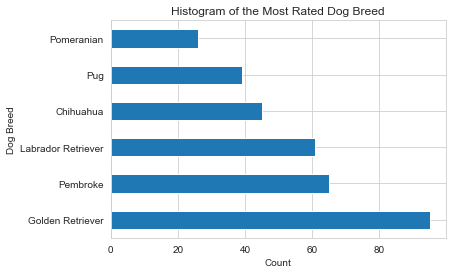

In [421]:
df_dog_breed = df_master.groupby('p1').filter(lambda x: len(x) >= 25)

df_dog_breed['p1'].value_counts().plot(kind = 'barh')
plt.title('Histogram of the Most Rated Dog Breed')
plt.xlabel('Count')
plt.ylabel('Dog Breed')

fig = plt.gcf() 
fig.savefig('data_wrangle/most_common_dog_breeds.png', bbox_inches='tight');

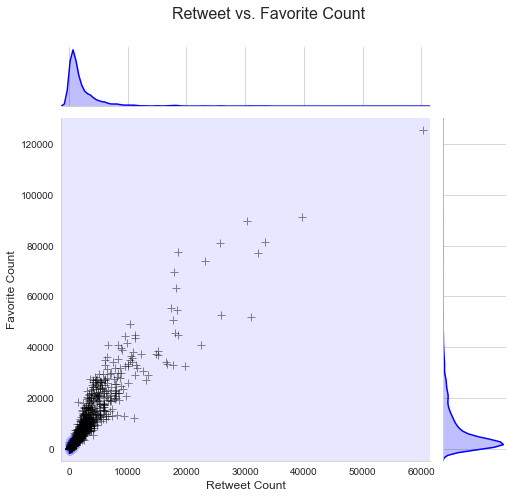

In [512]:
## Illustrate the difference between the favorite & retweet counts

sns.set_style('whitegrid')
## grf = sns.jointplot(x="retweet_count", y="favorite_count", data=df_master, color="blue", kind="kde", size=10)
grf = sns.jointplot(x="retweet_count", y="favorite_count", data=df_master, color="blue", kind="kde", height=7)
grf.plot_joint(plt.scatter, c="black", s=80, linewidth=1, marker="+", alpha=0.45)
grf.set_axis_labels("Retweet Count", "Favorite Count", fontsize=12)
## grf.set_title("Favorite vs. Retweet Count")

grf.fig.subplots_adjust(top=0.9)
plt.suptitle('Retweet vs. Favorite Count', fontsize=16);

> ## <a id="references"></a> References

- [Hadley Wickham, Tidy Data, The Journal of Statistical Software, vol. 59, 2014](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html)
- [Tidy Data Paper](http://vita.had.co.nz/papers/tidy-data.html)
- http://support.gnip.com/articles/identifying-and-understanding-retweets.html
- http://pandas.pydata.org/pandas-docs/version/0.19.2/generated/pandas.read_json.html
- https://stackoverflow.com/questions/13707457/python-value-that-occurs-the-most-in-a-list
- https://stackoverflow.com/questions/14661701/how-to-drop-a-list-of-rows-from-pandas-dataframe
- https://chrisalbon.com/python/pandas_join_merge_dataframe.html
- https://gwu-libraries.github.io/sfm-ui/posts/2016-11-10-twitter-interaction